In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import re
import warnings
import joblib
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.densenet import preprocess_input
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from keras.utils import to_categorical
from keras import backend as K
from rembg import remove
from PIL import Image
from tensorflow.keras.utils import plot_model

2023-04-15 04:12:31.173333: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


OSError: Could not find/load shared object file: libllvmlite.dylib
 Error was: [Errno 2] No such file or directory: '/Users/ttxking/miniconda3/envs/tf/lib/python3.9/site-packages/llvmlite/binding/libllvmlite.dylib'

In [3]:
warnings.filterwarnings("ignore")

In [4]:
def set_seed(seed):
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [5]:
set_seed(42)

In [6]:
image_dir = '../dataset/splited/shark_44/train'
test_dir = '../dataset/splited/shark_44/test'

In [7]:
def load_img(image_dir):
    list_images = []
    for label in os.listdir(image_dir):
        if label != '.DS_Store':
            for file in os.listdir(os.path.join(image_dir,label)):
                if re.search('jpg|JPG', file):
                    list_images.append(f"{image_dir}/{label}/{file}")
    return list_images

In [8]:
def extract_feature(list_images):
    features = []
    labels = []

    nb_features = 1920  
    features = np.empty((len(list_images), nb_features))

    for ind, image_path in enumerate(list_images):
        print('Processing %s...' % (image_path))
        img = image.load_img(image_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features[ind,:] = np.squeeze(extractor_model.predict(x))
        labels.append(image_path.split('/')[-2])
    
    return features, labels

# DenseNet as feature extractor

In [9]:
base_model = DenseNet201(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
extractor_model = Model(inputs=base_model.input, outputs=x)

In [ ]:
train_images = load_img(image_dir)
features, labels = extract_feature(train_images)

In [12]:
# Number of labels - 18
class_labels = os.listdir(image_dir)
if '.DS_Store' in class_labels:
    class_labels.remove('.DS_Store')
encoder_labels = LabelEncoder()
encoder_labels.fit(class_labels)
labels_numeric = encoder_labels.transform(labels)

LabelEncoder()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features, labels_numeric, test_size=0.1, random_state=42)

In [10]:
test_img = load_img(test_dir)
X_test, y_test = extract_feature(test_img)

Processing ../dataset/splited/shark_44/test/grey reef shark/C.amb09.jpg...


2023-04-13 03:23:55.647557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:23:55.647788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 3s 3s/step
Processing ../dataset/splited/shark_44/test/grey reef shark/C.amblyrhynchos.jpg...


2023-04-13 03:23:58.486158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:23:58.486389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 256ms/step
Processing ../dataset/splited/shark_44/test/grey reef shark/14722.jpg...


2023-04-13 03:23:58.809661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:23:58.809899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 255ms/step
Processing ../dataset/splited/shark_44/test/grey reef shark/1435811347971.jpg...


2023-04-13 03:23:59.124104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:23:59.124322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 268ms/step
Processing ../dataset/splited/shark_44/test/grey reef shark/14723.jpg...


2023-04-13 03:23:59.452571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:23:59.452807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 261ms/step
Processing ../dataset/splited/shark_44/test/grey reef shark/1435811342986.jpg...


2023-04-13 03:23:59.770022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:23:59.770233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 262ms/step
Processing ../dataset/splited/shark_44/test/grey reef shark/1123945.jpg...


2023-04-13 03:24:00.087062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:00.087282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 320ms/step
Processing ../dataset/splited/shark_44/test/great hammerhead/S.mok04.jpg...


2023-04-13 03:24:00.460281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:00.460524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 259ms/step
Processing ../dataset/splited/shark_44/test/great hammerhead/Smok51.jpg...


2023-04-13 03:24:00.841256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:00.841506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 352ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/IMG_1917.JPG...


2023-04-13 03:24:01.384432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:01.384737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 271ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/S.lew (14).JPG...


2023-04-13 03:24:01.751410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:01.751662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 293ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/S-lew-ธวัชชชัย.jpg...


2023-04-13 03:24:02.102013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:02.102238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 286ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/S.lew (29).jpg...


2023-04-13 03:24:02.456089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:02.456328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 338ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/11088.jpg...


2023-04-13 03:24:02.852799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:02.853018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 247ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/S.lew (28).JPG...


2023-04-13 03:24:03.151503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:03.151768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 287ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/S.lew (2).jpg...


2023-04-13 03:24:03.478270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:03.478486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 281ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/S.lew (10).JPG...


2023-04-13 03:24:03.846940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:03.847160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 266ms/step
Processing ../dataset/splited/shark_44/test/scalloped hammerhead/S.lew (21).jpg...


2023-04-13 03:24:04.286108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:04.286352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 247ms/step
Processing ../dataset/splited/shark_44/test/coral shark/A.mar051.jpg...


2023-04-13 03:24:04.618503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:04.618733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 332ms/step
Processing ../dataset/splited/shark_44/test/coral shark/A.mar01.jpg...


2023-04-13 03:24:04.991876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:04.992189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 276ms/step
Processing ../dataset/splited/shark_44/test/bull shark/IMG_0955.JPG...


2023-04-13 03:24:05.395450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:05.395726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 1s 595ms/step
Processing ../dataset/splited/shark_44/test/bull shark/IMG_0968.JPG...


2023-04-13 03:24:06.219664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:06.219940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 439ms/step
Processing ../dataset/splited/shark_44/test/bull shark/Carcharhinus leucas02.JPG...


2023-04-13 03:24:06.849579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:06.849930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 372ms/step
Processing ../dataset/splited/shark_44/test/bull shark/IMG_0952.JPG...


2023-04-13 03:24:07.337213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:07.337461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 299ms/step
Processing ../dataset/splited/shark_44/test/bull shark/IMG_0950.JPG...


2023-04-13 03:24:07.722142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:07.722464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 283ms/step
Processing ../dataset/splited/shark_44/test/bull shark/IMG_1837.JPG...


2023-04-13 03:24:08.325796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:08.326523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 393ms/step
Processing ../dataset/splited/shark_44/test/bull shark/IMG_1895.JPG...


2023-04-13 03:24:08.917045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:08.917296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 344ms/step
Processing ../dataset/splited/shark_44/test/bull shark/IMG_0966.JPG...


2023-04-13 03:24:09.359263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:09.359513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 346ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_3.jpg...


2023-04-13 03:24:09.762872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:09.763268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 294ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_0_1.jpg...


2023-04-13 03:24:10.112440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:10.112696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 337ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_6.jpg...


2023-04-13 03:24:10.519094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:10.519450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 269ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/278647.jpg...


2023-04-13 03:24:10.861743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:10.861961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 258ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_6_1.jpg...


2023-04-13 03:24:11.173568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:11.173787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 259ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_1_0.jpg...


2023-04-13 03:24:11.485922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:11.486147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 284ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C-sor2.jpg...


2023-04-13 03:24:11.914993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:11.915217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 248ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor (21).JPG...


2023-04-13 03:24:12.362932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:12.363152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 262ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_1_1.jpg...


2023-04-13 03:24:12.680851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:12.681164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 258ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor.JPG...


2023-04-13 03:24:13.000773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:13.000990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 258ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_3_1.jpg...


2023-04-13 03:24:13.313483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:13.313710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 255ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_10.jpg...


2023-04-13 03:24:13.617745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:13.618023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 263ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor19.JPG...


2023-04-13 03:24:13.951847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:13.952074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 311ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor31.JPG...


2023-04-13 03:24:14.450013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:14.450264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 366ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/IMG_9069.JPG...


2023-04-13 03:24:14.901400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:14.901647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 351ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_7_0.jpg...


2023-04-13 03:24:15.322994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:15.323241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 338ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_29.jpg...


2023-04-13 03:24:15.712920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:15.713107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 300ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_28.jpg...


2023-04-13 03:24:16.071720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:16.071952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 306ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_7_1.jpg...


2023-04-13 03:24:16.431106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:16.431335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 302ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_16.jpg...


2023-04-13 03:24:16.791465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:16.791727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 283ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_32.jpg...


2023-04-13 03:24:17.128963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:17.129189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 275ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_13_0.jpg...


2023-04-13 03:24:17.456017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:17.456246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 294ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_11_0.jpg...


2023-04-13 03:24:17.804248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:17.804483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 288ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_18.jpg...


2023-04-13 03:24:18.152368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:18.152608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 309ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor14.JPG...


2023-04-13 03:24:18.555881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:18.556133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 291ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_35.jpg...


2023-04-13 03:24:18.905253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:18.905496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 280ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_28_0.jpg...


2023-04-13 03:24:19.253034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:19.253286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 338ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor01.jpg...


2023-04-13 03:24:19.625953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:19.626139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 311ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor03.JPG...


2023-04-13 03:24:20.021468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:20.021705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 333ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor (22).JPG...


2023-04-13 03:24:20.541420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:20.541610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 348ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor02.jpg...


2023-04-13 03:24:20.929658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:20.929950: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 378ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_17_1.jpg...


2023-04-13 03:24:21.373714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:21.373955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 404ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_34_0.jpg...


2023-04-13 03:24:21.875762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:21.876083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 448ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/C.sor (6).JPG...


2023-04-13 03:24:22.640611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:22.640919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 411ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_12_1.jpg...


2023-04-13 03:24:23.130688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:23.131145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 403ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_43.jpg...


2023-04-13 03:24:23.668798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:23.669437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 359ms/step
Processing ../dataset/splited/shark_44/test/spottail shark/ฉลามหูดำ​ 9166_230109_14_0.jpg...


2023-04-13 03:24:24.084357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:24.084686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 267ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/9cc0d3db-4448-4e06-95bd-7561f8e8bf93.jpg...


2023-04-13 03:24:24.419566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:24.419789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 313ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064443.jpg...


2023-04-13 03:24:24.812742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:24.812991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 364ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064408-1.jpg...


2023-04-13 03:24:25.245439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:25.245703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 349ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/0b2e3b15-db29-437c-8999-e351f1977a98.jpg...


2023-04-13 03:24:25.674072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:25.674300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 379ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/158102.jpg...


2023-04-13 03:24:26.119225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:26.119451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 341ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C.ambo (3).JPG...


2023-04-13 03:24:26.667625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:26.667864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 300ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/d3611d15-1048-401c-9f98-3d1a2f099f59.jpg...


2023-04-13 03:24:27.038521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:27.038711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 309ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/f1a95996-a575-42c0-a8a0-7482d7ee0d32.jpg...


2023-04-13 03:24:27.418676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:27.418864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 321ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C.amb09.JPG...


2023-04-13 03:24:27.823788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:27.824023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 274ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064423.jpg...


2023-04-13 03:24:28.156715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:28.156941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 273ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C-ambo8.jpg...


2023-04-13 03:24:28.487104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:28.487506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 316ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C-ambo9.jpg...


2023-04-13 03:24:28.851396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:28.851781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 319ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/eaabaf04-344a-41ee-8656-9acc75afd903.jpg...


2023-04-13 03:24:29.243894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:29.244159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 336ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064418.jpg...


2023-04-13 03:24:29.637043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:29.637254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 281ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__1990661.jpg...


2023-04-13 03:24:29.967762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:29.967994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 288ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/20efed97-9da3-48a7-9771-59d052bb3047.jpg...


2023-04-13 03:24:30.327079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:30.327301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 298ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064400.jpg...


2023-04-13 03:24:30.685766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:30.686007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 309ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C.amb14.JPG...


2023-04-13 03:24:31.067283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:31.067500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 319ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064415.jpg...


2023-04-13 03:24:31.479251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:31.479460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 260ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C.amb03.JPG...


2023-04-13 03:24:31.818673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:31.818960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 307ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064416.jpg...


2023-04-13 03:24:32.200447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:32.200690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 391ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064442-1.jpg...


2023-04-13 03:24:32.659946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:32.660188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 351ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C.amb06.JPG...


2023-04-13 03:24:33.131553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:33.131812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 408ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2064404.jpg...


2023-04-13 03:24:33.618519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:33.618782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 1s 527ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/S__2039820.jpg...


2023-04-13 03:24:34.248096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:34.248410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 407ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/e184abb0-5cd3-4099-84c2-0b421364bb5f.jpg...


2023-04-13 03:24:34.788737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:34.789132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 1s 637ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C-ambo11.jpg...


2023-04-13 03:24:35.619414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:35.620103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 375ms/step
Processing ../dataset/splited/shark_44/test/pigeye shark/C-ambo7-1.jpg...


2023-04-13 03:24:36.056993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:36.057431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 477ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/1442578283391-1.jpg...


2023-04-13 03:24:36.590489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:36.590748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 288ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/C.pla06-1.jpg...


2023-04-13 03:24:37.000237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:37.000786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 432ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/1442578281553-1.jpg...


2023-04-13 03:24:37.522958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:37.523471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 475ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/1442578275367-1.jpg...


2023-04-13 03:24:38.100775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:38.101029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 465ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/1442578254253-1.jpg...


2023-04-13 03:24:38.660875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:38.661320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 417ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/1442578264693-1.jpg...


2023-04-13 03:24:39.166458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:39.166904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 419ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/26Aug15-1.jpg...


2023-04-13 03:24:39.659097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:39.659345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 440ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/IMAG2742-1.jpg...


2023-04-13 03:24:40.325714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:40.326082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 1s 559ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/1442578289414.jpg...


2023-04-13 03:24:40.963293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:40.963713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 387ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/1442578245580.jpg...


2023-04-13 03:24:41.438075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:41.438484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 1s 649ms/step
Processing ../dataset/splited/shark_44/test/whitespotted bambooshark/1442578267024.jpg...


2023-04-13 03:24:42.160912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:42.161218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 1s 703ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4702.JPG...


2023-04-13 03:24:43.044319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:43.044577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 429ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4714.JPG...


2023-04-13 03:24:43.709562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:43.709844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 395ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4739.JPG...


2023-04-13 03:24:44.568541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:44.568973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 293ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4699.JPG...


2023-04-13 03:24:44.980781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:44.980970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 315ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4706.JPG...


2023-04-13 03:24:45.564067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:45.565071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 1s 587ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4712.JPG...


2023-04-13 03:24:46.360015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:46.360323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 352ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/C.has01.jpg...


2023-04-13 03:24:46.768617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:46.768860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 372ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4743.JPG...


2023-04-13 03:24:47.303825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:47.304072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 356ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4722.JPG...


2023-04-13 03:24:47.836407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:47.836656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 399ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_1894.JPG...


2023-04-13 03:24:48.448873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:48.449173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 403ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4721.JPG...


2023-04-13 03:24:49.015141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:49.015403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 332ms/step
Processing ../dataset/splited/shark_44/test/indonesian bambooshark/IMG_4732.JPG...


2023-04-13 03:24:49.530692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:49.531076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 355ms/step
Processing ../dataset/splited/shark_44/test/zebra shark/S.fasciatum (7).jpg...


2023-04-13 03:24:49.966015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:49.966281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 378ms/step
Processing ../dataset/splited/shark_44/test/zebra shark/S.fas12.jpg...


2023-04-13 03:24:50.396085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:50.396353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 404ms/step
Processing ../dataset/splited/shark_44/test/zebra shark/S.fas15.JPG...


2023-04-13 03:24:51.104618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:51.105004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 433ms/step
Processing ../dataset/splited/shark_44/test/zebra shark/S.fasciatum (6).jpg...


2023-04-13 03:24:51.629691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:51.630073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 348ms/step
Processing ../dataset/splited/shark_44/test/zebra shark/S.fasciatum (11).jpg...


2023-04-13 03:24:52.051294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:52.051703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 319ms/step
Processing ../dataset/splited/shark_44/test/zebra shark/S.fasciatum (13).jpg...


2023-04-13 03:24:52.447430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:52.447842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 298ms/step
Processing ../dataset/splited/shark_44/test/zebra shark/S.fas18.JPG...


2023-04-13 03:24:52.941798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:52.942037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 326ms/step
Processing ../dataset/splited/shark_44/test/zebra shark/S.fas08.jpg...


2023-04-13 03:24:53.321812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:53.322093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 294ms/step
Processing ../dataset/splited/shark_44/test/tiger shark/G-cu-ธวัชชัย-ไกยะฝ่าย-1.jpg...


2023-04-13 03:24:53.706189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:53.706656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 477ms/step
Processing ../dataset/splited/shark_44/test/tiger shark/G.cuv (8).JPG...


2023-04-13 03:24:54.612563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:54.613038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 467ms/step
Processing ../dataset/splited/shark_44/test/tiger shark/G.cuv (11).JPG...


2023-04-13 03:24:55.347249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:55.347597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 374ms/step
Processing ../dataset/splited/shark_44/test/tiger shark/G.cuv (13).jpg...


2023-04-13 03:24:55.940584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:55.940834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 341ms/step
Processing ../dataset/splited/shark_44/test/tiger shark/IMG_0960.JPG...


2023-04-13 03:24:56.379504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:56.379748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 299ms/step
Processing ../dataset/splited/shark_44/test/tiger shark/G.cuv (18).jpg...


2023-04-13 03:24:56.875840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:56.876100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 300ms/step
Processing ../dataset/splited/shark_44/test/tiger shark/G.cuv (15).jpg...


2023-04-13 03:24:57.374035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:57.374348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 315ms/step
Processing ../dataset/splited/shark_44/test/slender bambooshark/IMG_7421-1.jpg...


2023-04-13 03:24:57.847879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:57.848094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 250ms/step
Processing ../dataset/splited/shark_44/test/slender bambooshark/1443592467386.jpg...


2023-04-13 03:24:58.149016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:58.149256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 264ms/step
Processing ../dataset/splited/shark_44/test/slender bambooshark/IMG_7424-1.jpg...


2023-04-13 03:24:58.518009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:58.518256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 295ms/step
Processing ../dataset/splited/shark_44/test/slender bambooshark/1443592452302-1.jpg...


2023-04-13 03:24:58.882170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:58.882420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 340ms/step
Processing ../dataset/splited/shark_44/test/slender bambooshark/1443592463771.jpg...


2023-04-13 03:24:59.283300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:59.283662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 308ms/step
Processing ../dataset/splited/shark_44/test/slender bambooshark/1443592471475.jpg...


2023-04-13 03:24:59.648325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:59.648713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 277ms/step
Processing ../dataset/splited/shark_44/test/slender bambooshark/1443592473461.jpg...


2023-04-13 03:24:59.975306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:24:59.975553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 261ms/step
Processing ../dataset/splited/shark_44/test/blacktip reef shark/C.mel (2).JPG...


2023-04-13 03:25:00.456022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:00.456283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 260ms/step
Processing ../dataset/splited/shark_44/test/blacktip reef shark/IMG_1904.JPG...


2023-04-13 03:25:00.872003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:00.872214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 274ms/step
Processing ../dataset/splited/shark_44/test/blacktip reef shark/IMG_1905.JPG...


2023-04-13 03:25:01.313571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:01.313792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 271ms/step
Processing ../dataset/splited/shark_44/test/blacktip reef shark/467834.jpg...


2023-04-13 03:25:01.655769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:01.656025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 404ms/step
Processing ../dataset/splited/shark_44/test/blacktip reef shark/C.mel (10).JPG...


2023-04-13 03:25:02.276797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:02.277053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 310ms/step
Processing ../dataset/splited/shark_44/test/blacktip reef shark/C.mel (1)-1.jpg...


2023-04-13 03:25:02.635825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:02.636070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 316ms/step
Processing ../dataset/splited/shark_44/test/blacktip reef shark/Carcharhinus melanopterus2.jpg...


2023-04-13 03:25:03.600111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:03.600369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 351ms/step
Processing ../dataset/splited/shark_44/test/blacktip reef shark/IMG_1882.JPG...


2023-04-13 03:25:04.145583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:04.145812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 297ms/step
Processing ../dataset/splited/shark_44/test/graceful shark/C.amb03.JPG...


2023-04-13 03:25:04.522351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:04.522567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 279ms/step
Processing ../dataset/splited/shark_44/test/graceful shark/C.amb17.JPG...


2023-04-13 03:25:05.057152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:05.057574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 286ms/step
Processing ../dataset/splited/shark_44/test/graceful shark/C.amb16.JPG...


2023-04-13 03:25:05.559420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:05.559660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 293ms/step
Processing ../dataset/splited/shark_44/test/graceful shark/C.amb13.JPG...


2023-04-13 03:25:06.070745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:06.070981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 273ms/step
Processing ../dataset/splited/shark_44/test/graceful shark/C.amb05.JPG...


2023-04-13 03:25:06.425895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:06.426134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 279ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/C.bre (10).JPG...


2023-04-13 03:25:06.937909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:06.938182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 329ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/10.00 UTC. Lat. 10 22’52”S, Long. 61 17’54”E stop.jpg...


2023-04-13 03:25:07.348333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:07.348721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 1s 534ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/C.bre (20).JPG...


2023-04-13 03:25:08.124052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:08.124936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 345ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/C.bre (8).jpg...


2023-04-13 03:25:08.509999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:08.510328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 269ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/C.bre01.jpg...


2023-04-13 03:25:08.824074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:08.824326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 303ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/C.bre00.jpg...


2023-04-13 03:25:09.173917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:09.174163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 369ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/C.bre (17).jpg...


2023-04-13 03:25:09.615842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:09.616201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 308ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/C.bre (6).jpg...


2023-04-13 03:25:09.964339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:09.964569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 309ms/step
Processing ../dataset/splited/shark_44/test/spinner shark/C.bre (14).jpg...


2023-04-13 03:25:10.339972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:10.340195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 291ms/step
Processing ../dataset/splited/shark_44/test/brownbanded shark/C.pun25.JPG...


2023-04-13 03:25:10.707587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:10.707822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 270ms/step
Processing ../dataset/splited/shark_44/test/brownbanded shark/IMG_1888-1.jpg...


2023-04-13 03:25:11.076775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:11.077012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 274ms/step
Processing ../dataset/splited/shark_44/test/brownbanded shark/C.pun08.JPG...


2023-04-13 03:25:11.434122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:11.434448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 276ms/step
Processing ../dataset/splited/shark_44/test/brownbanded shark/C.pun10.JPG...


2023-04-13 03:25:11.785760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:11.786008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 313ms/step
Processing ../dataset/splited/shark_44/test/brownbanded shark/C.pun11.JPG...


2023-04-13 03:25:12.174108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:12.174291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 325ms/step
Processing ../dataset/splited/shark_44/test/brownbanded shark/C.pun06.JPG...


2023-04-13 03:25:12.586577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:12.586800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 329ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/IMG_0163.JPG...


2023-04-13 03:25:13.040385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:13.040627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 265ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/IMG_0159.JPG...


2023-04-13 03:25:13.431108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:13.431397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 326ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/IMG_0171.JPG...


2023-04-13 03:25:13.890691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:13.890922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 319ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/T.obe02.jpg...


2023-04-13 03:25:14.251071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:14.251410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 309ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/T.obe01.jpg...


2023-04-13 03:25:14.599746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:14.600015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 322ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/IMG_0169.JPG...


2023-04-13 03:25:15.057845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:15.058081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 284ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/IMG_0156.JPG...


2023-04-13 03:25:15.472478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:15.472707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 305ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/IMG_0146.JPG...


2023-04-13 03:25:15.912687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:15.912908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 334ms/step
Processing ../dataset/splited/shark_44/test/whitetip reef shark/IMG_0152.JPG...


2023-04-13 03:25:16.366800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:16.367064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 328ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/C. griseum.JPG...


2023-04-13 03:25:16.762630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:16.762907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 277ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/IMG_2377.JPG...


2023-04-13 03:25:17.201389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:17.201627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 321ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/IMG_2388.JPG...


2023-04-13 03:25:17.681870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:17.682073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 274ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/C.gri11-1.jpg...


2023-04-13 03:25:18.083621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:18.083892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 315ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/C.gri12.JPG...


2023-04-13 03:25:18.618799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:18.619126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 321ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/C.gri06.JPG...


2023-04-13 03:25:19.026949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:19.027347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 269ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/C.gri02.JPG...


2023-04-13 03:25:19.383483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:19.383840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 269ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/C. griseum (6).JPG...


2023-04-13 03:25:19.724373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:19.724694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 272ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/IMG_4622.JPG...


2023-04-13 03:25:20.125257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:20.125489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 276ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/IMG_4626.JPG...


2023-04-13 03:25:20.556213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:20.556448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 254ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/IMG_4625.JPG...


2023-04-13 03:25:20.945720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:20.945975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 249ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/IMG_2378.JPG...


2023-04-13 03:25:21.372200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:21.372441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 245ms/step
Processing ../dataset/splited/shark_44/test/grey bambooshark/C. griseum (10).JPG...


2023-04-13 03:25:21.686835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:25:21.687075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 242ms/step


In [13]:
y_test_label = encoder_labels.transform(y_test)

# ANN

In [ ]:
ann_classifier = Sequential()
ann_classifier.add(Dense(1024, activation='relu', input_shape=(1920,)))
ann_classifier.add(Dropout(0.2))
ann_classifier.add(Dense(512, activation='relu'))
ann_classifier.add(Dropout(0.2))
ann_classifier.add(Dense(256, activation='relu'))
ann_classifier.add(Dropout(0.2))
ann_classifier.add(Dense(128, activation='relu'))
ann_classifier.add(Dense(18, activation='softmax'))

ann_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_classifier.fit(X_train, to_categorical(y_train), epochs=20, 
                             batch_size=32,
                             validation_data=(X_val, to_categorical(y_val)))

test_loss, test_acc = ann_classifier.evaluate(X_test, to_categorical(y_test_label, num_classes=18))
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


In [ ]:
densenet_classifier.save('../model/ann_model.h5')

# SVC

In [ ]:
clf = SVC(kernel='rbf', probability=True)

In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10],
              'C': [0.001, 0.01, 0.1, 1, 10]}

svc = SVC(kernel='rbf')

# perform grid search to find best gamma and C values
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(X_val, y_val)

best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']

print("Best gamma value:", grid_search.best_params_['gamma'])
print("Best C value:", grid_search.best_params_['C'])
print("Accuracy score:", grid_search.best_score_)

In [ ]:
clf.set_params(C=best_C)
clf.set_params(gamma=best_gamma)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
val_accuracy = clf.score(X_val, y_val)
y_test_num = encoder_labels.transform(y_test)
test_accuracy = clf.score(X_test, y_test_label)

print("Accuracy on training data:", train_accuracy)
print("Accuracy on validation data:", val_accuracy)
print("Accuracy on testing data:", test_accuracy)

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test_label, y_pred))

In [ ]:
joblib.dump(clf, '../model/svc_model.pkl')

# SGDClassifier

In [ ]:
clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

In [ ]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'l1_ratio': [0.15, 0.3, 0.5, 0.7, 0.85]}

sgd = SGDClassifier(loss='log_loss')

# perform grid search to find best alpha, penalty, and l1_ratio values
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5)
grid_search.fit(X_val, y_val)

best_alpha = grid_search.best_params_['alpha']
best_penalty = grid_search.best_params_['penalty']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print("Best alpha value:", best_alpha)
print("Best penalty value:", best_penalty)
print("Best l1_ratio value:", best_l1_ratio)
print("Accuracy score:", grid_search.best_score_)

In [ ]:
clf.set_params(alpha=best_alpha)
clf.set_params(penalty=best_penalty)
clf.set_params(l1_ratio=best_l1_ratio)
clf.fit(X_train, y_train)

In [ ]:
train_losses = []
val_losses = []
test_losses = []
for i in range(10):
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_pred = clf.predict_proba(X_train)
    train_loss = log_loss(y_train, train_pred, labels=clf.classes_)
    val_pred = clf.predict_proba(X_val)
    val_loss = log_loss(y_val, val_pred, labels=clf.classes_)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

train_accuracy = clf.score(X_train, y_train)
val_accuracy = clf.score(X_val, y_val)
test_accuracy = clf.score(X_test, y_test_label)

print("Accuracy on training data: {:.3f}".format(train_accuracy))
print("Average training loss: {:.3f}".format(np.mean(train_losses)))
print("Accuracy on validation data: {:.3f}".format(val_accuracy))
print("Average validation loss: {:.3f}".format(np.mean(val_losses)))
print("Accuracy on testing data: {:.3f}".format(test_accuracy))

In [ ]:
joblib.dump(clf, '../model/sgd_model.pkl')

# Avenger Ensemble

In [15]:
model_1 = load_model('../model/v1/ann_model.h5')
model_2 = joblib.load('../model/v1/svc_model.pkl')
model_3 = joblib.load('../model/v1/sgd_model.pkl')

In [16]:
models = [model_1, model_2, model_3]

In [17]:
predictions = []
for model in models:
    pred = model.predict(X_test)
    if len(pred.shape) == 1:  
        pred_onehot = np.zeros((len(pred), 18))  
        pred_onehot[np.arange(len(pred)), pred] = 1  
        predictions.append(pred_onehot)
    else:  
        predictions.append(pred)

predictions = np.array(predictions)
summed = np.sum(predictions, axis=0)
ensemble_prediction = np.argmax(summed, axis=1)

6/6 [==============================] - 0s 2ms/step


2023-04-13 03:28:11.538837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [188,1920]
	 [[{{node Placeholder/_10}}]]
2023-04-13 03:28:11.539060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [188,1920]
	 [[{{node Placeholder/_10}}]]


In [18]:
# get the predicted classes
pred_classes1 = np.argmax(predictions[0], axis=1)
pred_classes2 = np.argmax(predictions[1], axis=1)
pred_classes3 = np.argmax(predictions[2], axis=1)

# Average ensemble

In [19]:
accuracy1 = accuracy_score(y_test_label, pred_classes1)
accuracy2 = accuracy_score(y_test_label, pred_classes2)
accuracy3 = accuracy_score(y_test_label, pred_classes3)
ensemble_accuracy = accuracy_score(y_test_label, ensemble_prediction)

val_accuracies = [accuracy1, accuracy2, accuracy3]

print('Accuracy Score for model 1 = ', accuracy1)
print('Accuracy Score for model 2 = ', accuracy2)
print('Accuracy Score for model 3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model 1 =  0.776595744680851
Accuracy Score for model 2 =  0.8031914893617021
Accuracy Score for model 3 =  0.7446808510638298
Accuracy Score for average ensemble =  0.7925531914893617


# Weight Average Ensemble

In [20]:
weights = [acc / sum(val_accuracies) for acc in val_accuracies]

weighted_preds = np.tensordot(predictions, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test_label, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.776595744680851
Accuracy Score for model2 =  0.8031914893617021
Accuracy Score for model3 =  0.7446808510638298
Accuracy Score for average ensemble =  0.7925531914893617
Accuracy Score for weighted average ensemble =  0.7978723404255319


# Find Best Weight

In [21]:
df = pd.DataFrame([])

for w1 in range(1, 11):
    for w2 in range(1, 11):
        for w3 in range(1, 11):
            # normalize weights to sum to 1
            total_weight = w1 + w2 + w3
            if total_weight == 0:
                continue
            wts = [w1/total_weight, w2/total_weight, w3/total_weight]

            # get weighted predictions and calculate accuracy
            wted_preds = np.tensordot(predictions, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds, axis=1)
            weighted_accuracy = accuracy_score(y_test_label, wted_ensemble_pred)

            # add results to dataframe
            df = pd.concat([df, pd.DataFrame({'wt1': wts[0], 'wt2': wts[1], 
                                               'wt3': wts[2], 
                                               'acc': weighted_accuracy*100}, index=[0])],
                                               ignore_index=True)
            
# find the row with the highest accuracy
max_acc_row = df.iloc[df['acc'].idxmax()]

# print the results
print("Max accuracy of ", max_acc_row['acc'], " obtained with w1=", max_acc_row['wt1'],
      " w2=", max_acc_row['wt2'], " w3=", max_acc_row['wt3'])

Max accuracy of  80.31914893617021  obtained with w1= 0.25  w2= 0.5  w3= 0.25


Predicted Label:  tiger shark
True Label:  tiger shark


([<matplotlib.axis.XTick at 0x7fb12f56d580>,
 [Text(0, 0, 'grey reef shark'),
  Text(1, 0, 'great hammerhead'),
  Text(2, 0, 'scalloped hammerhead'),
  Text(3, 0, 'coral shark'),
  Text(4, 0, 'bull shark'),
  Text(5, 0, 'spottail shark'),
  Text(6, 0, 'pigeye shark'),
  Text(7, 0, 'whitespotted bambooshark'),
  Text(8, 0, 'indonesian bambooshark'),
  Text(9, 0, 'zebra shark'),
  Text(10, 0, 'tiger shark'),
  Text(11, 0, 'slender bambooshark'),
  Text(12, 0, 'blacktip reef shark'),
  Text(13, 0, 'graceful shark'),
  Text(14, 0, 'spinner shark'),
  Text(15, 0, 'brownbanded shark'),
  Text(16, 0, 'whitetip reef shark'),
  Text(17, 0, 'grey bambooshark')])

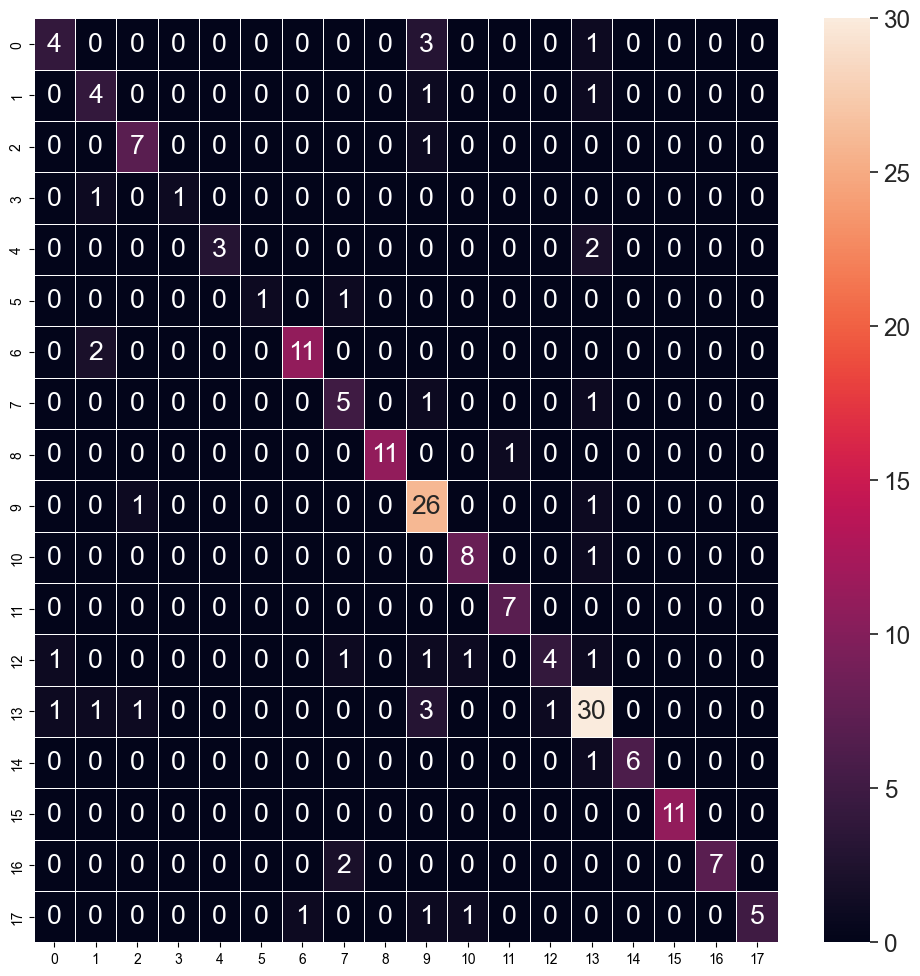

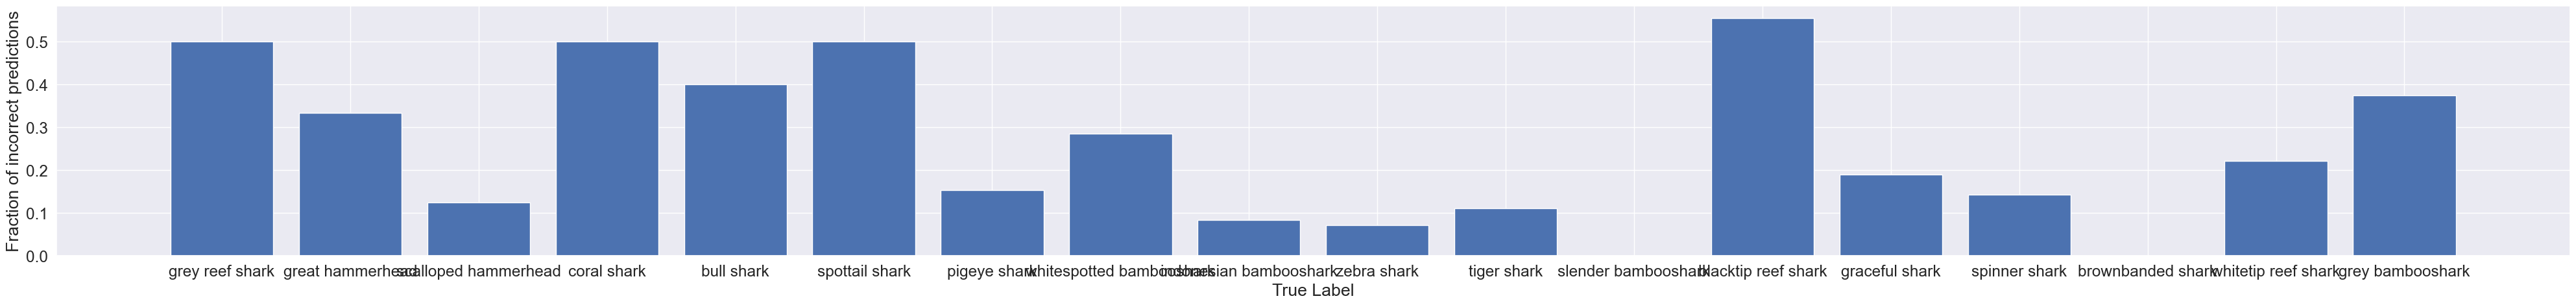

In [22]:
best_weights = [0.25, 0.5, 0.25]

ideal_weighted_preds = np.tensordot(predictions, best_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)
ideal_weighted_accuracy = accuracy_score(y_test_label, ideal_weighted_ensemble_prediction)

i = random.choice(ideal_weighted_ensemble_prediction)

print("Predicted Label: ", class_labels[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_labels[int(y_test_label[i])])

#Print confusion matrix
cm = confusion_matrix(y_test_label, ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(50,5))
plt.bar(np.arange(18), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(18), class_labels)

# For the BOT

In [23]:
def extract_feature_no_bg(list_images):
    data = []
    labels = []

    nb_features = 1920  
    features = np.empty((len(list_images), nb_features))

    for ind, img_path in enumerate(list_images):
        print('Processing image %s...' % (img_path))
        img = image.load_img(img_path, target_size=(299, 299))
        output1 = remove(img)
        output2 = output1.convert('RGB')
        x = image.img_to_array(output2)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features[ind,:] = np.squeeze(extractor_model.predict(x))
        labels.append(img_path.split('/')[-2])
    
    return features, labels

In [30]:
def predict_ensemble(features):
    preds_1 = model_1.predict(features)
    sorted_preds1 = np.sort(preds_1)
    top_preds1 = sorted_preds1[0][-1:-3:-1]
    sorted_idx1 = np.argsort(preds_1)
    top_label1 = sorted_idx1[0][-1:-4:-1]
    
    preds_2 = model_2.predict(features)
    preds_prob_2 = model_2.predict_proba(features)
    sorted_preds2 = np.sort(preds_prob_2)
    top_preds2 = sorted_preds2[0][-1:-3:-1]
    sorted_idx2 = np.argsort(preds_prob_2)
    top_label2 = sorted_idx2[0][-1:-4:-1]

    preds_3 = model_3.predict(features)
    preds_prob_3 = model_3.predict_proba(features)
    sorted_preds3 = np.sort(preds_prob_3)
    top_preds3 = sorted_preds3[0][-1:-3:-1]
    sorted_idx3 = np.argsort(preds_prob_3)
    top_label3 = sorted_idx3[0][-1:-4:-1]

    # Apply the best weight values to the predicted outputs of each model
    weighted_preds_1 = preds_1 * best_weights[0]
    weighted_preds_2 = preds_2 * best_weights[1]
    weighted_preds_3 = preds_3 * best_weights[2]
    
    final_preds = np.argmax(weighted_preds_1 + weighted_preds_2 + weighted_preds_3, axis=1)
    final_preds_label = encoder_labels.inverse_transform(final_preds)
    
    print('Top 3 class for Model 1:', top_label1)
    print('Top 3 class for Model 2:', top_label2)
    print('Top 3 class for Model 3:', top_label3)
    
    print(top_preds1)
    print(top_preds2)
    print(top_preds3)
    
    if top_preds1[0] - top_preds1[1] >= 0.5 or top_preds2[0] - top_preds2[1] >= 0.5 or top_preds3[0] - top_preds3[1] >= 0.5:
        if top_preds1[0] - top_preds1[1] > 0.01 and top_preds2[0] - top_preds2[1] > 0.01 and top_preds3[0] - top_preds3[1] > 0.01:
            print('This image is', final_preds_label[0])
            return "Y", final_preds
        else:
            return "N", final_preds
    else:
        return "N", final_preds

In [25]:
def final_answer(pred1, pred2):
    if pred1 == pred2:
        p1 = encoder_labels.inverse_transform(pred1)[0]
        return p1
    else:
        p1 = encoder_labels.inverse_transform(pred1)[0]
        p2 = encoder_labels.inverse_transform(pred2)[0]
        return p1,p2

In [33]:
image_path = ['../dataset/pigeye.jpeg']
features, labels = extract_feature(image_path)
img_pred_class1 = predict_ensemble(features)

features2, labels2 = extract_feature_no_bg(image_path)
img_pred_class2 = predict_ensemble(features2)

if img_pred_class2[0] == "N" and img_pred_class1[0] == "N":
    print("Can you use Diffrenet Images")
    
elif img_pred_class2[0] == "Y" and img_pred_class1[0] == "N":
    print("Can you use Diffrenet Images")
    
else:
    x = final_answer(img_pred_class1[1], img_pred_class2[1])
    print(x)
    exit()

Processing ../dataset/pigeye.jpeg...


2023-04-13 04:12:22.599606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]
2023-04-13 04:12:22.600062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,299,299,3]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 30ms/step
Top 3 class for Model 1: [0 7 9]
Top 3 class for Model 2: [7 2 4]
Top 3 class for Model 3: [ 9 11  0]
[0.32842404 0.16561301]
[0.21029865 0.12702834]
[0.20730186 0.12013666]
Processing image ../dataset/pigeye.jpeg...


2023-04-13 04:12:22.999486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,1920]
	 [[{{node Placeholder/_10}}]]
2023-04-13 04:12:22.999731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,1920]
	 [[{{node Placeholder/_10}}]]
2023-04-13 04:12:24.973073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 28ms/step
Top 3 class for Model 1: [ 0  7 10]
Top 3 class for Model 2: [ 7 10  4]
Top 3 class for Model 3: [ 7 10  0]
[0.22366299 0.22010529]
[0.32973299 0.18052104]
[0.15813114 0.15450581]
Can you use Diffrenet Images


2023-04-13 04:12:25.310428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,1920]
	 [[{{node Placeholder/_10}}]]
2023-04-13 04:12:25.310694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,1920]
	 [[{{node Placeholder/_10}}]]


## GRAVEYARD

In [ ]:
# encoder_labels.inverse_transform([img_pred_class])

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               491776    
                                                                 
 dense_1 (Dense)             (None, 18)                4626      
                                                                 
Total params: 496,402
Trainable params: 496,402
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_2.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
model_3.get_params()

{'alpha': 0.1,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'learning_rate': 'optimal',
 'loss': 'log_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [35]:
def predict_ensemble(features):
    preds_1 = model_1.predict(features)
    sorted_preds1 = np.sort(preds_1)
    top_preds1 = sorted_preds1[0][-1:-3:-1]
    sorted_idx1 = np.argsort(preds_1)
    top_label1 = sorted_idx1[0][-1:-4:-1]

    preds_2 = model_2.predict(features)
    preds_prob_2 = model_2.predict_proba(features)
    sorted_preds2 = np.sort(preds_prob_2)
    top_preds2 = sorted_preds2[0][-1:-3:-1]
    sorted_idx2 = np.argsort(preds_prob_2)
    top_label2 = sorted_idx2[0][-1:-4:-1]

    preds_3 = model_3.predict(features)
    preds_prob_3 = model_3.predict_proba(features)
    sorted_preds3 = np.sort(preds_prob_3)
    top_preds3 = sorted_preds3[0][-1:-3:-1]
    sorted_idx3 = np.argsort(preds_prob_3)
    top_label3 = sorted_idx3[0][-1:-4:-1]

    # Apply the best weight values to the predicted outputs of each model
    weighted_preds_1 = preds_1 * best_weights[0]
    weighted_preds_2 = preds_2 * best_weights[1]
    weighted_preds_3 = preds_3 * best_weights[2]

    final_preds = np.argmax(
        weighted_preds_1 + weighted_preds_2 + weighted_preds_3, axis=1)
    final_preds_label = encoder_labels.inverse_transform(final_preds)

    print('Top 3 class for Model 1:', top_label1)
    print('Top 3 class for Model 2:', top_label2)
    print('Top 3 class for Model 3:', top_label3)
    
    return final_preds

image_path = ['../dataset/pigeye.jpeg']
features, labels = extract_feature(image_path)
img_pred_class1 = predict_ensemble(features)

features2, labels2 = extract_feature_no_bg(image_path)
img_pred_class2 = predict_ensemble(features2)

x = final_answer(img_pred_class1, img_pred_class2)